In [1]:
%matplotlib inline


Black-box interpretation of models: LIME
=========================================

See also skater: a more modern variant relying on heavier dependencies
https://github.com/datascienceinc/Skater

First we need to install lime with the following shell line::

    $ pip install --user lime

Lime uses the notion of "explainers", for different types of data,
tabular, image, text.




In [6]:
!conda install -y lime

Solving environment: done

## Package Plan ##

  environment location: /home/tom/.local/miniconda

  added / updated specs:
    - lime


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lime-0.1.1.36              |             py_0         230 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         230 KB

The following NEW packages will be INSTALLED:

  lime               conda-forge/noarch::lime-0.1.1.36-py_0



lime-0.1.1.36        | 230 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


Regression on tabular data: factors of prices of houses
--------------------------------------------------------

Load the data, create and fit a regressor



In [7]:
from sklearn import datasets, ensemble, model_selection

boston = datasets.load_boston()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    boston.data, boston.target)

regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train)

/home/tom/.local/miniconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Inspect predictions for a few houses

For this, separate out the categorical features:



In [8]:
import numpy as np
categorical_features = [i for i, col in enumerate(boston.data.T)
                        if np.unique(col).size < 10]

Now use a lime explainer for tabular data



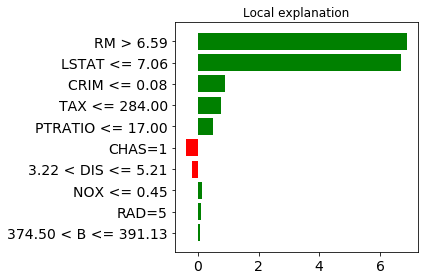

In [9]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train,
    feature_names=boston.feature_names,
    class_names=['price'],
    categorical_features=categorical_features,
    mode='regression')

# Now explain a prediction
exp = explainer.explain_instance(X_test[25], regressor.predict,
        num_features=10)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [10]:
print(exp.as_list())

[('RM > 6.59', 6.875720069663397), ('LSTAT <= 7.06', 6.688310153578302), ('CRIM <= 0.08', 0.8870529183989935), ('TAX <= 284.00', 0.7701427505422831), ('PTRATIO <= 17.00', 0.4881437697166221), ('CHAS=1', -0.3955573294062964), ('3.22 < DIS <= 5.21', -0.1853403029837337), ('NOX <= 0.45', 0.12553477869693658), ('RAD=5', 0.09577224942621614), ('374.50 < B <= 391.13', 0.0720015075525982)]


Explain a few more predictions



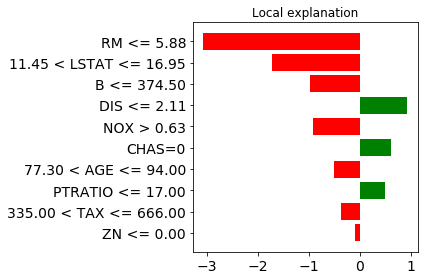

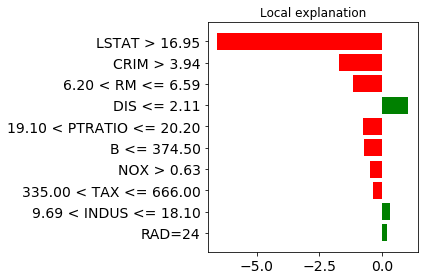

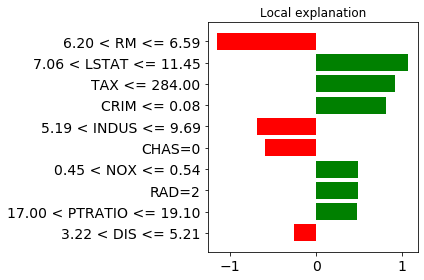

In [11]:
for i in [7, 50, 66]:
    exp = explainer.explain_instance(X_test[i], regressor.predict,
            num_features=10)
    exp.as_pyplot_figure()
    plt.tight_layout()